Following guide from here https://github.com/googlesamples/mediapipe/blob/main/examples/face_landmarker/python/%5BMediaPipe_Python_Tasks%5D_Face_Landmarker.ipynb

We first need to download the model checkpoint and an example image.

In [33]:
!wget -O face_landmarker_v2_with_blendshapes.task -q https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/1/face_landmarker.task
!wget -q -O image.png https://storage.googleapis.com/mediapipe-assets/business-person.png


In [34]:
dir(mp.solutions.drawing_styles)

['DrawingSpec',
 'HandLandmark',
 'Mapping',
 'PoseLandmark',
 'Tuple',
 '_BLUE',
 '_CYAN',
 '_FACEMESH_CONTOURS_CONNECTION_STYLE',
 '_FACEMESH_CONTOURS_CONNECTION_STYLE_1',
 '_GRAY',
 '_GREEN',
 '_HAND_CONNECTION_STYLE',
 '_HAND_LANDMARK_STYLE',
 '_INDEX_FINGER_LANDMARKS',
 '_MAGENTA',
 '_MIDDLE_FINGER_LANDMARKS',
 '_PALM_LANDMARKS',
 '_PEACH',
 '_PINKY_FINGER_LANDMARKS',
 '_POSE_LANDMARKS_LEFT',
 '_POSE_LANDMARKS_RIGHT',
 '_PURPLE',
 '_RADIUS',
 '_RED',
 '_RING_FINGER_LANDMARKS',
 '_THICKNESS_CONTOURS',
 '_THICKNESS_DOT',
 '_THICKNESS_FINGER',
 '_THICKNESS_POSE_LANDMARKS',
 '_THICKNESS_TESSELATION',
 '_THICKNESS_WRIST_MCP',
 '_THUMP_LANDMARKS',
 '_WHITE',
 '_YELLOW',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'face_mesh_connections',
 'get_default_face_mesh_contours_style',
 'get_default_face_mesh_iris_connections_style',
 'get_default_face_mesh_tesselation_style',
 'get_default_hand_connections_style',
 'get_def

In [35]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp

def draw_landmarks_on_image(rgb_image, detection_result):
  face_landmarks_list = detection_result.face_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected faces to visualize.
  for idx in range(len(face_landmarks_list)):
    face_landmarks = face_landmarks_list[idx]

    # Draw the face landmarks.
    face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    face_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in face_landmarks
    ])

    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_FACE_OVAL,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp.solutions.drawing_styles
          .get_default_face_mesh_tesselation_style())

  return annotated_image

def plot_face_blendshapes_bar_graph(face_blendshapes):
  # Extract the face blendshapes category names and scores.
  face_blendshapes_names = [face_blendshapes_category.category_name for face_blendshapes_category in face_blendshapes]
  face_blendshapes_scores = [face_blendshapes_category.score for face_blendshapes_category in face_blendshapes]
  # The blendshapes are ordered in decreasing score value.
  face_blendshapes_ranks = range(len(face_blendshapes_names))

  fig, ax = plt.subplots(figsize=(12, 12))
  bar = ax.barh(face_blendshapes_ranks, face_blendshapes_scores, label=[str(x) for x in face_blendshapes_ranks])
  ax.set_yticks(face_blendshapes_ranks, face_blendshapes_names)
  ax.invert_yaxis()

  # Label each bar with values
  for score, patch in zip(face_blendshapes_scores, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{score:.4f}", va="top")

  ax.set_xlabel('Score')
  ax.set_title("Face Blendshapes")
  plt.tight_layout()
  plt.show()

In [36]:
mp.solutions.face_mesh.FACEMESH_LEFT_EYE
mp.solutions.face_mesh.FACEMESH_RIGHT_EYE
mp.solutions.face_mesh.FACEMESH_FACE_OVAL

frozenset({(10, 338),
           (21, 54),
           (54, 103),
           (58, 132),
           (67, 109),
           (93, 234),
           (103, 67),
           (109, 10),
           (127, 162),
           (132, 93),
           (136, 172),
           (148, 176),
           (149, 150),
           (150, 136),
           (152, 148),
           (162, 21),
           (172, 58),
           (176, 149),
           (234, 127),
           (251, 389),
           (284, 251),
           (288, 397),
           (297, 332),
           (323, 361),
           (332, 284),
           (338, 297),
           (356, 454),
           (361, 288),
           (365, 379),
           (377, 152),
           (378, 400),
           (379, 378),
           (389, 356),
           (397, 365),
           (400, 377),
           (454, 323)})

In [37]:
dir(mp.solutions.face_mesh)

['FACEMESH_CONTOURS',
 'FACEMESH_FACE_OVAL',
 'FACEMESH_IRISES',
 'FACEMESH_LEFT_EYE',
 'FACEMESH_LEFT_EYEBROW',
 'FACEMESH_LEFT_IRIS',
 'FACEMESH_LIPS',
 'FACEMESH_NOSE',
 'FACEMESH_NUM_LANDMARKS',
 'FACEMESH_NUM_LANDMARKS_WITH_IRISES',
 'FACEMESH_RIGHT_EYE',
 'FACEMESH_RIGHT_EYEBROW',
 'FACEMESH_RIGHT_IRIS',
 'FACEMESH_TESSELATION',
 'FaceMesh',
 'NamedTuple',
 'SolutionBase',
 '_BINARYPB_FILE_PATH',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'association_calculator_pb2',
 'constant_side_packet_calculator_pb2',
 'detections_to_rects_calculator_pb2',
 'gate_calculator_pb2',
 'image_to_tensor_calculator_pb2',
 'inference_calculator_pb2',
 'landmarks_refinement_calculator_pb2',
 'logic_calculator_pb2',
 'non_max_suppression_calculator_pb2',
 'np',
 'rect_transformation_calculator_pb2',
 'split_vector_calculator_pb2',
 'ssd_anchors_calculator_pb2',
 'tensors_to_classification_calculator_pb2',
 'tensors_to_detections_

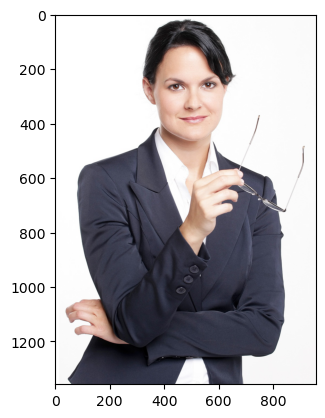

In [38]:
import cv2

img = cv2.imread("..\\data\\raw\\Images\\image.png")[:,:,[2,1,0]]
plt.imshow(img)

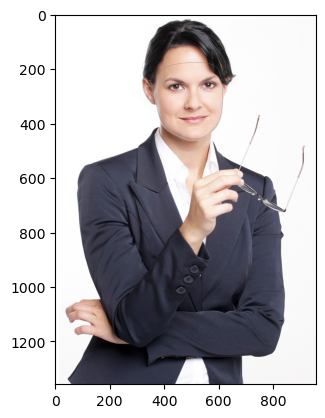

In [39]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an FaceLandmarker object.
base_options = python.BaseOptions(model_asset_path='..\\data\\pytorch_checkpoints\\face_landmarker_v2_with_blendshapes.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)
detector = vision.FaceLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("..\\data\\raw\\Images\\image.png")

# STEP 4: Detect face landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
plt.imshow(cv2.cvtColor(annotated_image[:,:,[2,1,0]], cv2.COLOR_RGB2BGR))